In [8]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
sns.set_context('paper')
plt.style.use("default")
pd.set_option('display.max_columns', None)

In [9]:
with open("../Data/simu6a1_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
df_study = df_study.loc[df_study.session < 500]
df_test = df_test.loc[df_test.session < 500]

In [10]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,list,session
0,716,141,HOOP,BLUEJAY,1,0
1,1261,862,SEAGULL,MAN,1,0
2,1067,1402,PIKE,SUIT,1,0
3,146,707,BOLT,HIGHWAY,1,0
4,155,1140,BOULDER,PUDDLE,1,0
...,...,...,...,...,...,...
2995,119,1259,BELLY,SEA,1,499
2996,914,1322,MOON,SKYSCRAPER,1,499
2997,203,633,BUTCHER,GHETTO,1,499
2998,1283,645,SHEPHERD,GOBLIN,1,499


In [11]:
df_test

,test_itemno,test_item,correct_ans,lag,list,session,order
0,330,CLOWN,1599,0,1,0,2
1,155,BOULDER,1140,2,1,0,1
2,707,HIGHWAY,146,4,1,0,2
3,1067,PIKE,1402,6,1,0,1
4,862,MAN,1261,8,1,0,2
...,...,...,...,...,...,...,...
2995,645,GOBLIN,1283,2,1,499,2
2996,203,BUTCHER,633,4,1,499,1
2997,914,MOON,1322,6,1,499,1
2998,119,BELLY,1259,8,1,499,1


### Run CMR-IA

In [12]:
s_mat = np.load('../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [13]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.5,
    beta_cue = 0.5,
    beta_distract = 0.5,
    beta_rec_new = 0.1,
    beta_rec_post = 0.5,
    gamma_fc = 0.2,
    gamma_cf = 0.2,
    s_fc = 0.25,
    s_cf = 0.25,
    c_thresh = 0.01,
    c_thresh_ass = 0.01,
    a = 2800,
    b = 2.14,
    m = 0,
    n = 1,
    kappa = 0.02,
    lamb = 0.01,
    eta = 0,
    alpha = 0.5,
    omega = 2,
    phi_s = 1.2,
    phi_d = 0.6,
    nitems_in_accumulator = 12,
    d_ass = 0.4
)
params

# using parameters from simu5, the figure gives a U shape, because of U shape f_in diff, because primacy
# prob: how to flatten end? how to make initial decrease straight?
# 7.17 phi_s, phi_d could only flatten the last three
# phi_s control the base level and the last node
# phi_d control the last two

{'beta_enc': 0.5,
 'beta_rec': 0.5,
 'beta_cue': 0.5,
 'beta_rec_new': 0.1,
 'beta_rec_post': 0.5,
 'beta_distract': 0.5,
 'phi_s': 1.2,
 'phi_d': 0.6,
 's_cf': 0.25,
 's_fc': 0.25,
 'kappa': 0.02,
 'eta': 0,
 'omega': 2,
 'alpha': 0.5,
 'c_thresh': 0.01,
 'c_thresh_ass': 0.01,
 'd_ass': 0.4,
 'lamb': 0.01,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 12,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 2.14,
 'm': 0,
 'n': 1,
 'c1': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.2,
 'gamma_cf': 0.2}

In [14]:
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 8.847082138061523


,list,session,test_itemno,s_resp,s_rt,csim
0,1,0,330,1599.0,2440.0,0.533946
1,1,0,155,1140.0,2280.0,0.552188
2,1,0,707,146.0,3090.0,0.446222
3,1,0,1067,155.0,3150.0,0.620521
4,1,0,862,1261.0,2930.0,0.446217
...,...,...,...,...,...,...
2995,1,499,645,1283.0,3040.0,0.447931
2996,1,499,203,633.0,3120.0,0.441751
2997,1,499,914,645.0,3170.0,0.623944
2998,1,499,119,1259.0,3480.0,0.398113


In [15]:
df_simu = df_simu.merge(df_test,on=['session','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list_x,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,list_y,order,correct
0,1,0,330,1599.0,2440.0,0.533946,CLOWN,1599,0,1,2,True
1,1,0,155,1140.0,2280.0,0.552188,BOULDER,1140,2,1,1,True
2,1,0,707,146.0,3090.0,0.446222,HIGHWAY,146,4,1,2,True
3,1,0,1067,155.0,3150.0,0.620521,PIKE,1402,6,1,1,False
4,1,0,862,1261.0,2930.0,0.446217,MAN,1261,8,1,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,499,645,1283.0,3040.0,0.447931,GOBLIN,1283,2,1,2,True
2996,1,499,203,633.0,3120.0,0.441751,BUTCHER,633,4,1,1,True
2997,1,499,914,645.0,3170.0,0.623944,MOON,1322,6,1,1,False
2998,1,499,119,1259.0,3480.0,0.398113,BELLY,1259,8,1,1,True


In [16]:
# f_dif

In [17]:
sessions = np.unique(df_simu.session)
for sess in sessions:
    df_tmp = df_study.loc[df_study.session == sess]
    tmp1 = df_tmp.study_itemno1.to_numpy()
    tmp2 = df_tmp.study_itemno2.to_numpy()
    tmp = np.concatenate((tmp1, tmp2))
    tmp = np.sort(tmp)
    tmp_test = df_simu.loc[df_study.session == sess,"test_itemno"]
    tmp_corr = df_simu.loc[df_study.session == sess,"correct_ans"]
    testid = np.searchsorted(tmp, tmp_test)
    corrid = np.searchsorted(tmp, tmp_corr)
    
    df_simu.loc[df_simu.session == sess, 'corr_fin']= [f_dif[sess][i][id] for i, id in enumerate(corrid)]
    # df_simu.loc[df_simu.session == sess, 'omean_fin'] = [np.mean(np.delete(f_dif[sess][i], id)) for i, id in corrid]
    df_simu.loc[df_simu.session == sess, 'omax_fin'] = [np.max(np.delete(f_dif[sess][i], id)) for i, id in enumerate(corrid)]
df_simu

,list_x,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,list_y,order,correct,corr_fin,omax_fin
0,1,0,330,1599.0,2440.0,0.533946,CLOWN,1599,0,1,2,True,-0.535739,-0.571822
1,1,0,155,1140.0,2280.0,0.552188,BOULDER,1140,2,1,1,True,-0.506611,-0.650867
2,1,0,707,146.0,3090.0,0.446222,HIGHWAY,146,4,1,2,True,-0.606319,-0.698626
3,1,0,1067,155.0,3150.0,0.620521,PIKE,1402,6,1,1,False,-0.714482,-0.671092
4,1,0,862,1261.0,2930.0,0.446217,MAN,1261,8,1,2,True,-0.587864,-0.680752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,499,645,1283.0,3040.0,0.447931,GOBLIN,1283,2,1,2,True,-0.609833,-0.675018
2996,1,499,203,633.0,3120.0,0.441751,BUTCHER,633,4,1,1,True,-0.614181,-0.706569
2997,1,499,914,645.0,3170.0,0.623944,MOON,1322,6,1,1,False,-0.624409,-0.689164
2998,1,499,119,1259.0,3480.0,0.398113,BELLY,1259,8,1,1,True,-0.636329,-0.649581


In [18]:
df_fin = df_simu.groupby('lag')[['corr_fin','omax_fin']].mean().reset_index()
df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
df_fin

,lag,corr_fin,omax_fin,dif
0,0,-0.548976,-0.623720,0.074744
1,2,-0.647936,-0.672790,0.024854
2,4,-0.692468,-0.701161,0.008693
3,6,-0.690398,-0.705228,0.014830
4,8,-0.687673,-0.699673,0.012000
5,10,-0.686889,-0.702379,0.015490


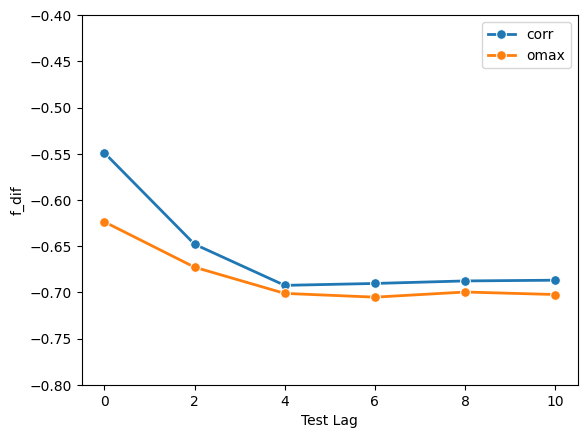

In [19]:
sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7, label='corr')
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7, label='omax')
plt.ylim([-0.8,-0.4])
plt.xlabel('Test Lag')
plt.ylabel('f_dif')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

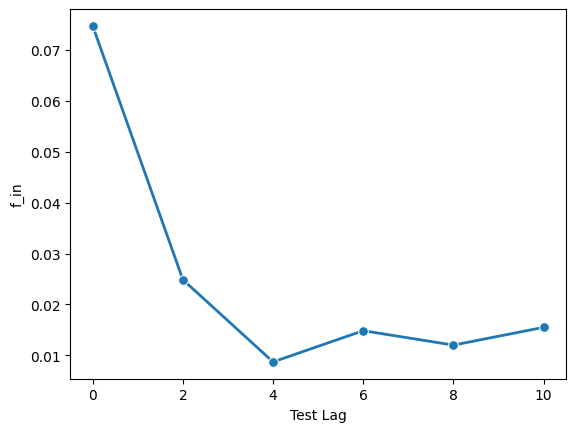

In [20]:
sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('f_in')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

### PLOT

In [21]:
df_laggp = df_simu.groupby(['lag','order']).correct.mean().to_frame(name='corr_rate').reset_index()
df_laggp

,lag,order,corr_rate
0,0,1,0.966942
1,0,2,0.961240
2,2,1,0.868644
3,2,2,0.878788
4,4,1,0.511029
5,4,2,0.574561
6,6,1,0.319502
7,6,2,0.347490
8,8,1,0.243446
9,8,2,0.244635


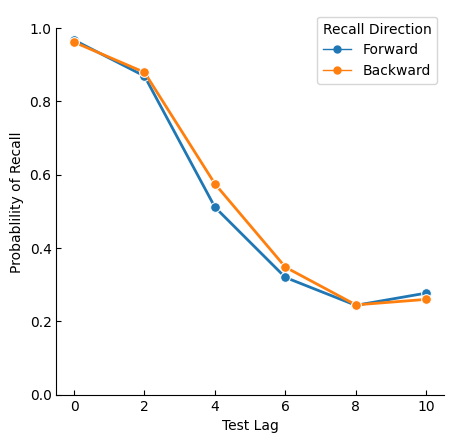

In [22]:
from matplotlib.lines import Line2D

fig,ax = plt.subplots(figsize=(5,5))
ax.spines['left'].set_bounds(0, 1)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp, x='lag', y='corr_rate', linewidth=2, marker='o', markersize = 7, hue='order',palette='tab10')
plt.ylim([0,1.05])
plt.xlabel('Test Lag')
plt.ylabel('Probablility of Recall')
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=1, marker='o',
                          markersize = 5, linestyle='-',label = 'Forward'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=1, marker='o',
                          markersize = 5, linestyle='-', label = 'Backward')]
L = plt.legend(handles = legend_elements, title='Recall Direction',loc='upper right')
# L.get_texts()[0].set_text('Forward')
# L.get_texts()[1].set_text('Backward')
# plt.savefig('fig/simu6a_recall.pdf')
plt.show()